# Analysis of the UK Referendum petition

In [45]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import io
import json

# sns.set(context='talk')
plt.style.use(['bmh', 'seaborn-talk'])

In [109]:
!rsync -vaz 'raspberrypi.local:petition-stats/data-*.json' .

data_files = glob.iglob('data*.json')
OFFSET = 2093225 - 1972043

dfs = []

for filename in data_files:
    with open(filename) as infile:
        data = json.load(infile)
        stats = data['data']['attributes']['signatures_by_constituency']
        s = io.StringIO()
        json.dump(stats, s)
        s.seek(0)
        df = pd.read_json(s)
        n_constituencies = len(df)
        av_correction_factor = OFFSET // n_constituencies
        df['corrected_signature_count'] = df['signature_count'] + av_correction_factor
        
        timestamp = int(filename.split('-')[-1].split('.')[0])
        df['timestamp'] = timestamp
        dfs.append(df)
df = pd.concat(dfs)

df['time'] = pd.to_datetime(df['timestamp'] * 1E9)
df = df.set_index('time').tz_localize('UTC').tz_convert('Europe/London')

receiving file list ... done
data-1466888751.json
data-1466888812.json
data-1466888874.json
data-1466888934.json
data-1466888996.json
data-1466889057.json
data-1466889119.json
data-1466889180.json
data-1466889241.json
data-1466889303.json
data-1466889364.json
data-1466889424.json
data-1466889486.json
data-1466889547.json
data-1466889609.json
data-1466889670.json
data-1466889731.json
data-1466889793.json
data-1466889854.json

sent 434 bytes  received 355794 bytes  142491.20 bytes/sec
total size is 17285861  speedup is 48.52


[<matplotlib.text.Text at 0x114a0dba8>, <matplotlib.text.Text at 0x112c64e48>]

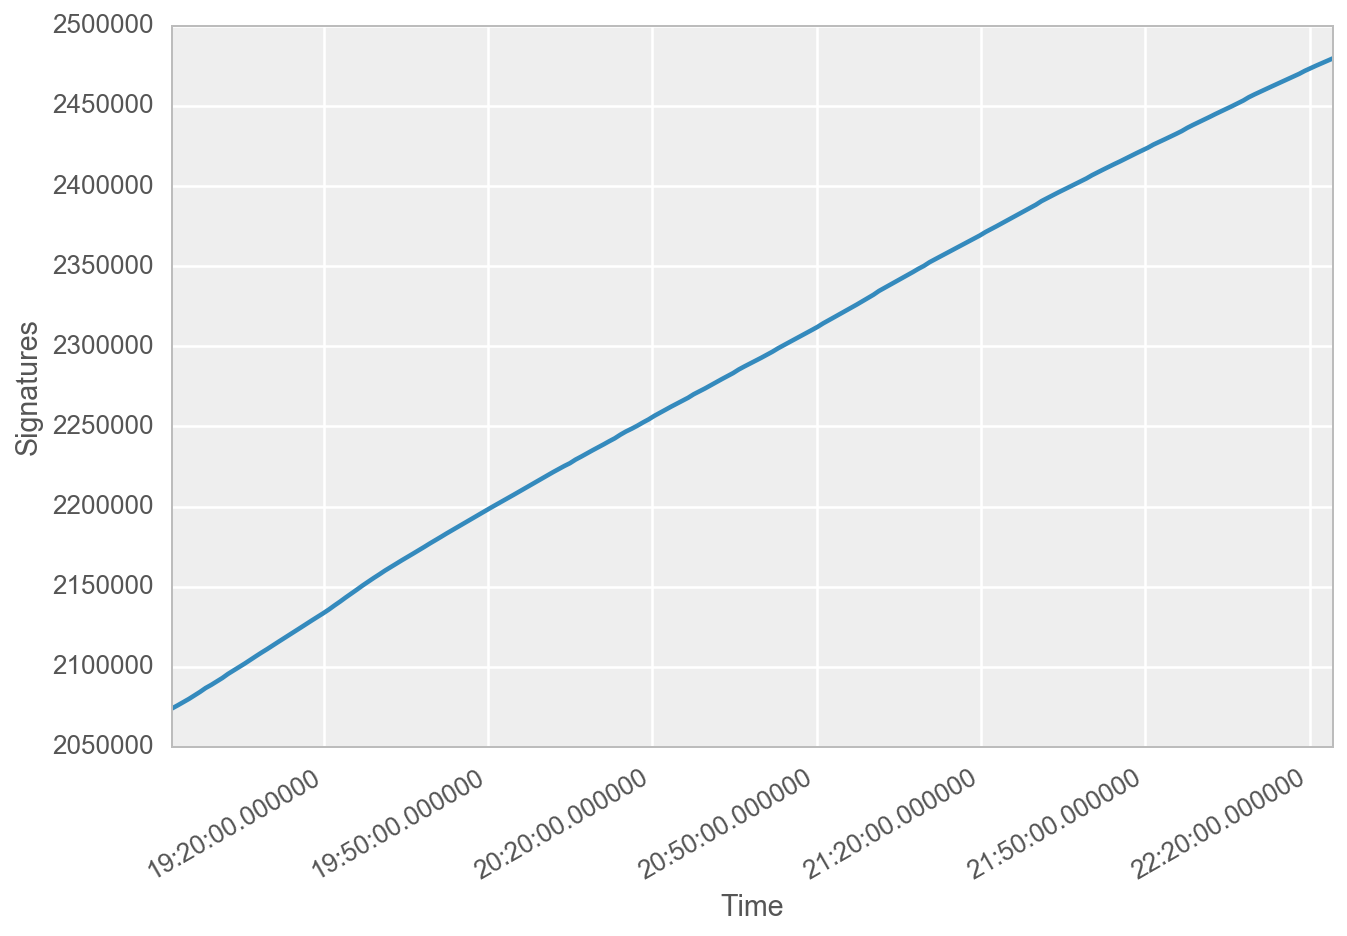

In [110]:
g = df.groupby(level=0)['corrected_signature_count'].sum()
ax = g.plot(x='index')
ax.set(xlabel='Time', ylabel='Signatures')

In [111]:
sig_count = df.groupby('timestamp').sum()['corrected_signature_count']

In [112]:
unique_timestamps = np.sort(df['timestamp'].unique())
last_entry = df[df.timestamp == unique_timestamps.max()]

[<matplotlib.text.Text at 0x114a0dba8>, <matplotlib.text.Text at 0x112c64e48>]

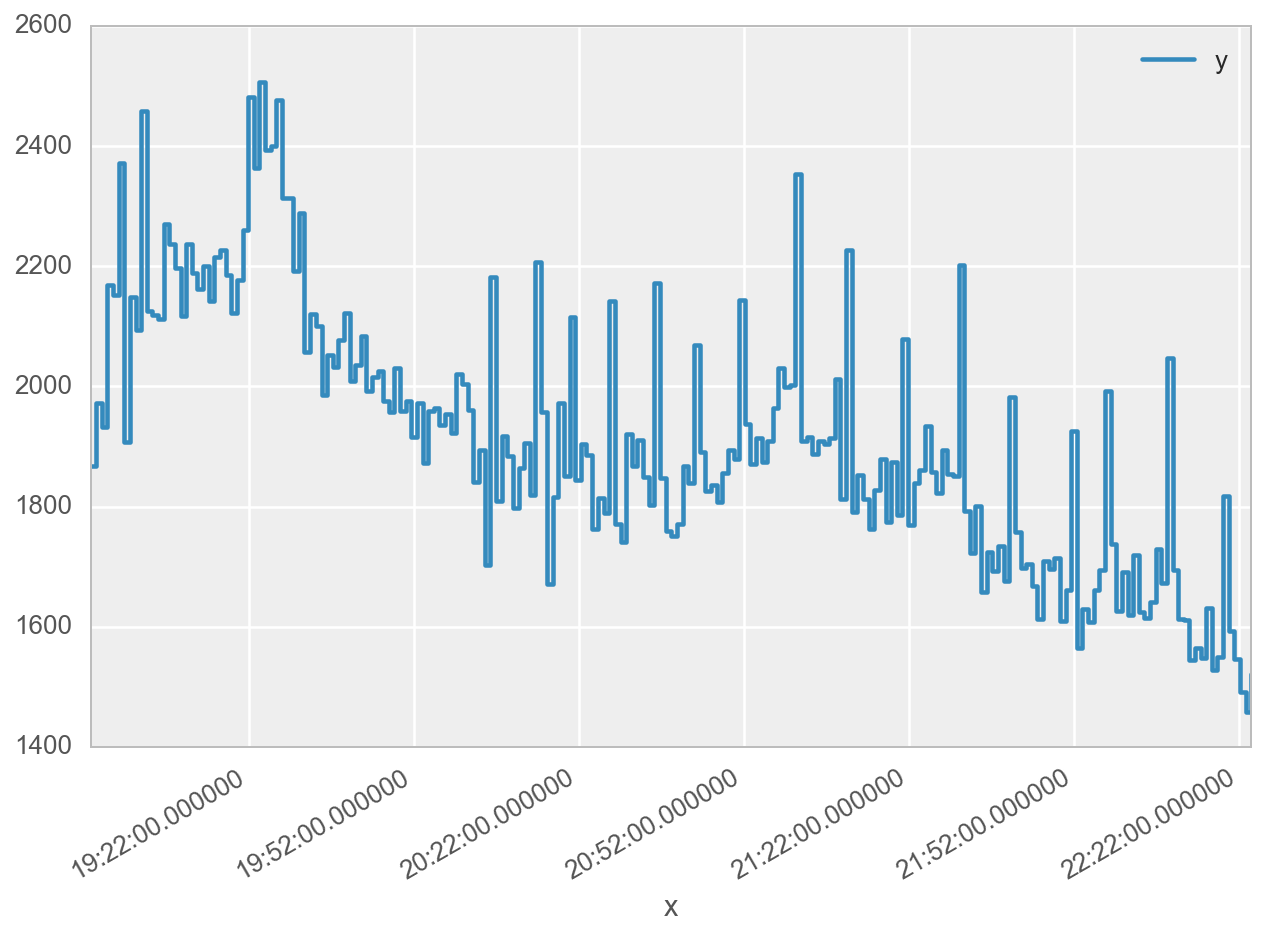

In [114]:
dt = np.diff(unique_timestamps)
rate = np.diff(sig_count) * 60. / dt
rate_df = pd.DataFrame({'x': g.index[1:], 'y': rate}).set_index('x')
rate_df.plot(y='y', drawstyle='steps-post')
ax.set(xlabel='Time', ylabel='Signatures per minute')

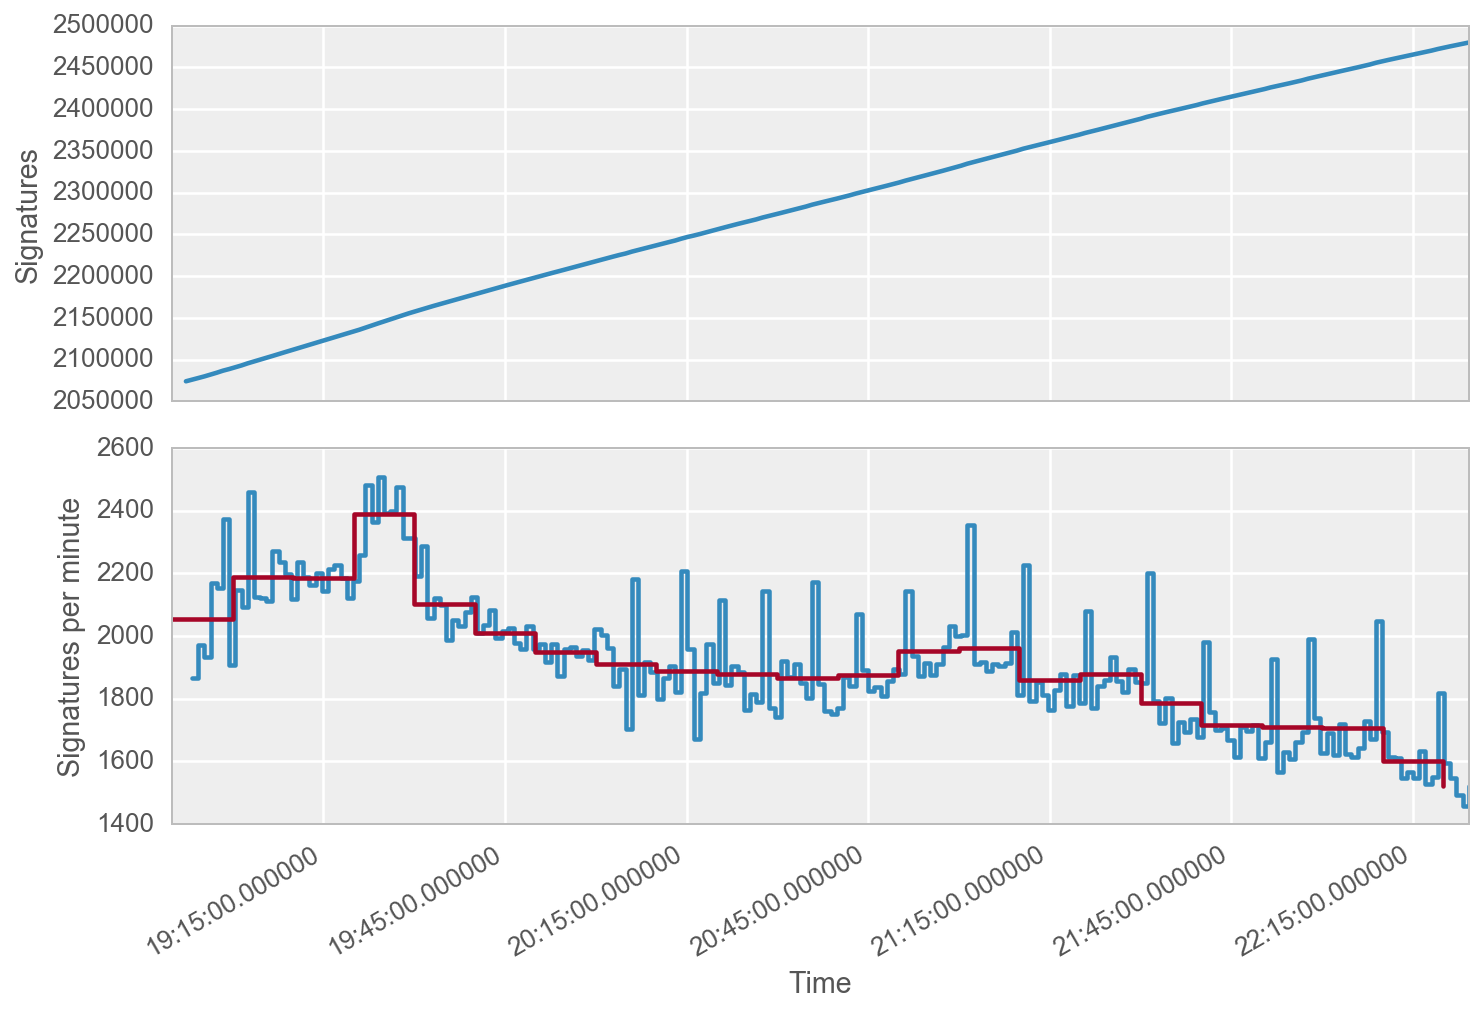

In [115]:
fig, axes = plt.subplots(2, 1, sharex=True)
g.plot(x='index', ax=axes[0])
rate_df.plot(y='y', ax=axes[1], legend=False, drawstyle='steps-post')
rate_df.resample('10T').mean().plot(y='y', ax=axes[1], legend=False, drawstyle='steps-post')
axes[0].set(ylabel='Signatures')
axes[1].set(xlabel='Time', ylabel='Signatures per minute')
fig.tight_layout()
fig.savefig('summary.png')

In [52]:
highest_10 = last_entry.sort_values(by='corrected_signature_count', ascending=False).head(10)
highest_10

,mp,name,ons_code,signature_count,corrected_signature_count,timestamp
time,,,,,,
2016-06-25 22:04:50+01:00,Catherine West MP,Hornsey and Wood Green,E14000752,14561,14747,1466888690
2016-06-25 22:04:50+01:00,Thangam Debbonaire MP,Bristol West,E14000602,13838,14024,1466888690
2016-06-25 22:04:50+01:00,Tulip Siddiq MP,Hampstead and Kilburn,E14000727,13701,13887,1466888690
2016-06-25 22:04:50+01:00,Keir Starmer MP,Holborn and St Pancras,E14000750,13204,13390,1466888690
2016-06-25 22:04:50+01:00,Ms Diane Abbott MP,Hackney North and Stoke Newington,E14000720,12882,13068,1466888690
2016-06-25 22:04:50+01:00,Rt Hon Jeremy Corbyn MP,Islington North,E14000763,12390,12576,1466888690
2016-06-25 22:04:50+01:00,Meg Hillier MP,Hackney South and Shoreditch,E14000721,12178,12364,1466888690
2016-06-25 22:04:50+01:00,Caroline Lucas MP,"Brighton, Pavilion",E14000598,12137,12323,1466888690
2016-06-25 22:04:50+01:00,Zac Goldsmith MP,Richmond Park,E14000896,11900,12086,1466888690


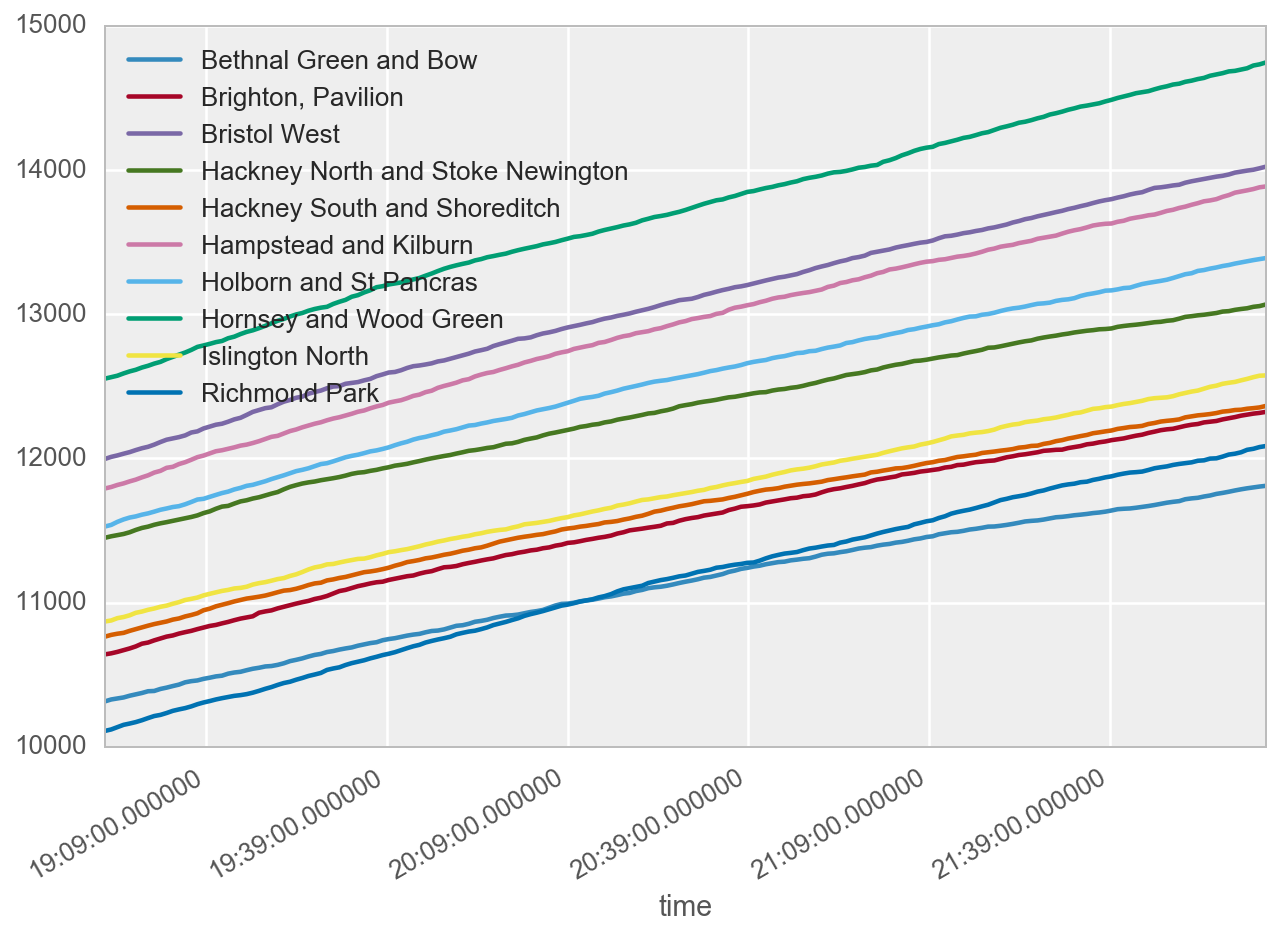

In [53]:
highest_10_timeseries = df[df['ons_code'].apply(lambda o: o in highest_10['ons_code'].values)]

fig, axis = plt.subplots()
for name, group in highest_10_timeseries.groupby('name'):
    group['corrected_signature_count'].plot(ax=axis, label=name)
axis.legend(loc='best')

In [83]:
unique_constituencies = np.sort(df.name.unique())

pixels = np.zeros((len(unique_consituencies), len(unique_timestamps)))
for j, constituency in enumerate(unique_consituencies):
    sample = df[df.name == constituency]
    for i, timestamp in enumerate(unique_timestamps):
        ind = (sample.timestamp == timestamp).values
        count = sample[ind].corrected_signature_count.values.item()
        pixels[j, i] = count

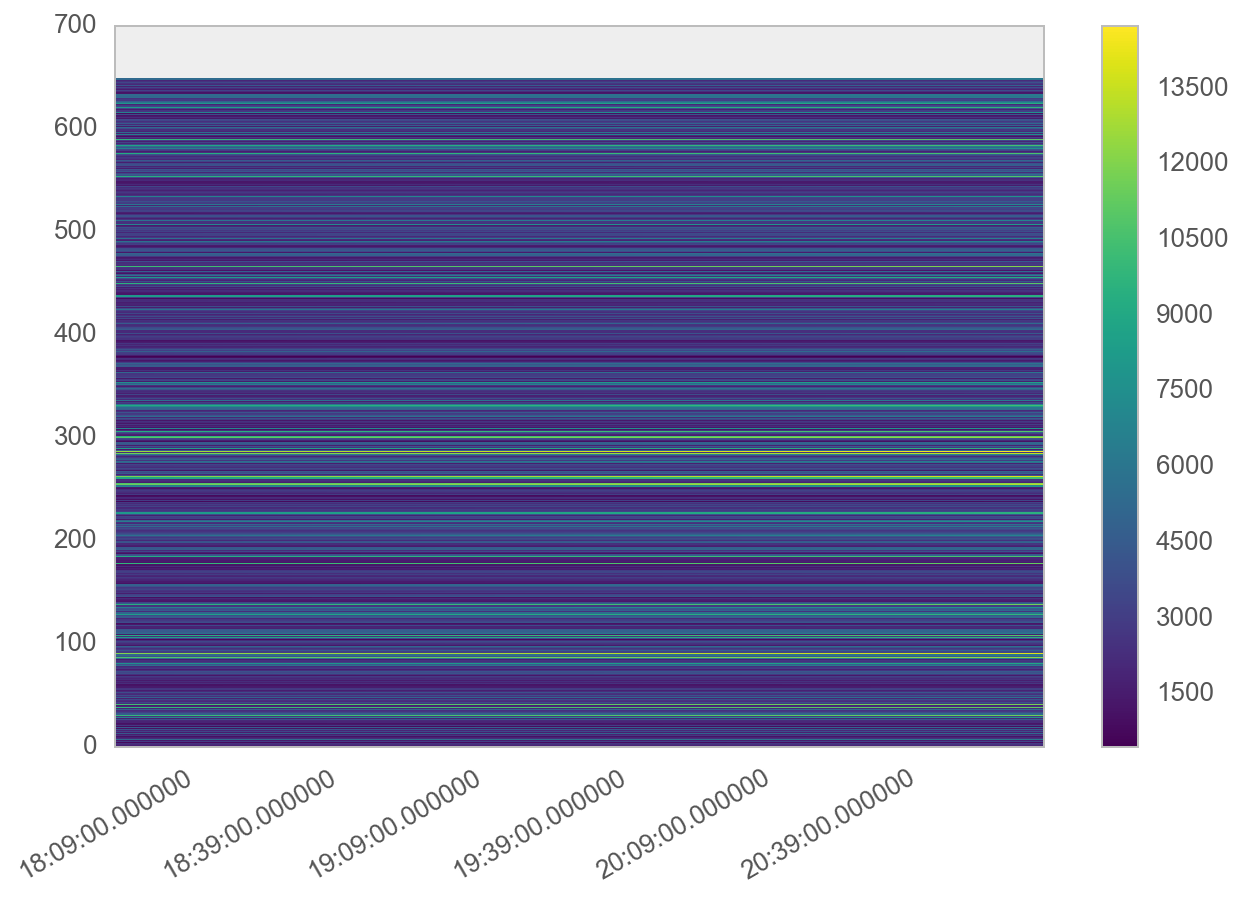

In [105]:
fig, axis = plt.subplots()
mappable = axis.pcolormesh(g.index, np.arange(pixels.shape[0]), pixels, cmap='viridis')
fig.colorbar(mappable, ax=axis)
fig.autofmt_xdate()